In [1]:
# 1.导入需要的算法库和模块
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
# 2. 探索数据
wine = load_wine()
wine.data.shape

(178, 13)

In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
#如果wine是一张表，应该长这样
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
# 3. 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)
Xtrain.shape

(124, 13)

In [7]:
Xtest.shape

(54, 13)

In [8]:
# 4. 建立模型
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)     #返回预测的准确
score

0.8703703703703703

In [9]:
# 5. 画出一棵树
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜 色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"] 
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot.bat', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [10]:
# 6. 探索决策树
#特征重要性 
clf.feature_importances_
[*zip(feature_name, clf.feature_importances_)]

[('酒精', 0.05607315044937422),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.07754808728725063),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.0),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜 色强度', 0.014109363528689956),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.482168294630385),
 ('脯氨酸', 0.3701011041043003)]

In [11]:
# 在每次分枝时，不从使用全部特征，而是随 机选取一部分特征，从中选取不纯度相关指标最优的作为分枝用的节点。这样，每次生成的树也就不同了。
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)  #返回预测的准确度
score

0.8518518518518519

In [12]:
# 树一旦建成，我们依然是使用剪枝参数来防止过拟合
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=30
                                 ,splitter='random'
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.8518518518518519

In [13]:
import graphviz
dot_data = tree.export_graphviz(clf
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot.bat', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [14]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

In [15]:
# min_samples_split限定，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则 分枝就不会发生
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=30
                                 ,splitter='random'
                                 ,max_depth=3
                                 ,min_samples_leaf=10
                                 ,min_samples_split=10
                                 )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot.bat', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [16]:
clf.score(Xtrain,Ytrain)
clf.score(Xtest, Ytest)

0.7222222222222222

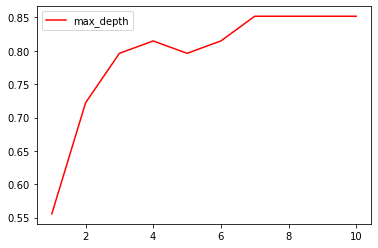

In [17]:
# 确认最优的剪枝参数
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion='entropy'
                                     ,random_state=30
                                     ,splitter='random'
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11), test, color='red', label='max_depth')
plt.legend()
plt.show()

In [18]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([15, 19, 26,  5,  9,  3, 16, 21, 26,  5,  9,  9, 26,  3,  4,  9, 26,
        9,  5,  3,  3, 26,  9, 14,  9, 19,  3,  9,  3, 14,  3,  3, 26, 19,
        9, 16, 14,  5,  3,  3, 16,  5,  3, 15, 26, 24, 24,  9,  3,  5,  5,
        5,  3, 26], dtype=int64)

In [19]:
#predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0,
       1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       0, 0, 0, 1, 2, 1, 1, 1, 2, 0])

In [20]:
# 1. 导入需要的库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

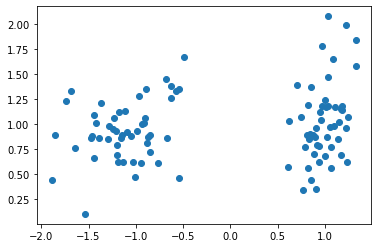

In [21]:
# 2. 生成三种数据集 
# 我们先从sklearn自带的数据库中生成三种类型的数据集：1）月亮型数据，2）环形数据，3）二分型数据
# make_classification库生成随机的二分型数据
X, y = make_classification(n_samples=100   #生成100个样本
                          ,n_features=2    #包含2个特征，即生成二维数据
                          ,n_redundant=0   #添加冗余特征0个 
                          ,n_informative=2    #包含信息的特征是2个 
                          ,random_state=1 #随机模式1 
                          ,n_clusters_per_class=1     #每个簇内包含的标签类别有1个 
                          )
#在这里可以查看一下X和y，其中X是100行带有两个2特征的数据，y是二分类标签 
#也可以画出散点图来观察一下X中特征的分布 
plt.scatter(X[:,0],X[:,1])

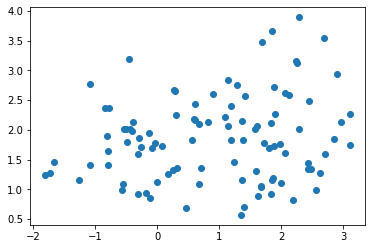

In [22]:
#从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成 随机数组，通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏 #注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，两个簇的数据会混合在一起，分类器的效应会 继续下降 
rng = np.random.RandomState(2)    #生成一种随机模式 
X += 2 * rng.uniform(size=X.shape)  #加减0~1之间的随机数 
linearly_separable = (X, y)     #生成了新的X，依然可以画散点图来观察一下特征的分布
plt.scatter(X[:,0], X[:,1])

In [23]:
#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中 \
datasets = [make_moons(noise=0.3
                      ,random_state=0)
           ,make_circles(noise=0.2
                        ,factor=0.5
                        ,random_state=1)
           ,linearly_separable]

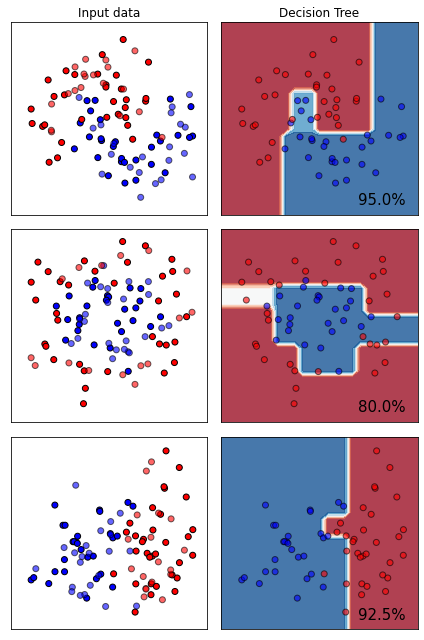

In [24]:
#创建画布，宽高比为6*9 
figure = plt.figure(figsize=(6, 9))
#设置用来安排图像显示位置的全局变量i
i = 1
#开始迭代数据，对datasets中的数据进行for循环
for ds_index, ds in enumerate(datasets):
    #对X中的数据进行标准化处理，然后分训练集和测试集 
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=42)
    #找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，创造一个比两个特征的区间本身更大 一点的区间
    x1_min, x1_max = X[:,0].min() - .5, X[:,0].max() + .5
    x2_min, x2_max = X[:,1].min() - .5, X[:,1].max() + .5
    #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点    
    #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长   
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。    
    #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以 narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵    
    #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二 维的
    array1, array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2)
                                ,np.arange(x2_min, x2_max, 0.2))
    #接下来生成彩色画布    
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)
    #到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题    
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title('Input data')
    #将数据集的分布放到我们的坐标上
    #先放训练集
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train
              ,cmap=cm_bright, edgecolors='k')
    #放测试集
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test,
              cmap=cm_bright, alpha=0.6, edgecolors='k')
    #为图设置坐标轴的最大值和最小值, 并设定没有坐标轴
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    #每次循环之后, 改变i的取值让图每次位列不同的位置
    i += 1
    #至此为止，数据集本身的图像已经布置完毕，运行以上的代码，可以看见三个已经处理好的数据集        
    #############################从这里开始是决策树模型##########################        
    #迭代决策树，首先用subplot增加子图，subplot(行，列，索引)这样的结构，并使用索引i定义图的位置    
    #在这里，len(datasets)其实就是3，2是两列    
    #在函数最开始，我们定义了i=1，并且在上边建立数据集的图像的时候，已经让i+1,所以i在每次循环中的取值 是2，4，6
    ax = plt.subplot(len(datasets), 2, i)
    #决策树的建模过程：实例化 → fit训练 → score接口得到预测的准确率    
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    #绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max]    
    #分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率    
    #类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量    
    #由于决策树在训练的时候导入的训练集X_train里面包含两个特征，所以我们在计算类概率的时候，也必须导入 结构相同的数组，即是说，必须有两个特征    
    #ravel()能够将一个多维数组转换成一维数组    
    #np.c_是能够将两个数组组合起来的函数    
    #在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策 树模型，生成的Z包含数据的索引和每个样本点对应的类概率，再切片，且出类概率 
    Z = clf.predict_proba(np.c_[array1.ravel(), array2.ravel()])[:, 1]
    #np.c_[np.array([1,2,3]), np.array([4,5,6])]
    #将返回的类概率作为数据, 放到contourf里面绘制去绘制轮廓
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    #将数据集放到我们的坐标系上
    #将训练集放到图中去
    ax.scatter(X_train[:, 0], X_train[:, 1]
               ,c=y_train, cmap=cm_bright,edgecolors='k', alpha=0.6)
    #为图设置坐标的最大值和最小值
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    #设定坐标轴不显示标尺也不显示数字
    ax.set_xticks(())
    ax.set_yticks(())
    #我们有三个坐标轴, 但是我们只需要在第一个坐标轴上有标题, 因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title('Decision Tree')
    #写在右下角的数字
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100))
           ,size=15, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()

In [25]:
# 建立一棵树
# 1.导入需要的算法库和模块
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [26]:
# 2.探索数据
wine = load_wine()
wine.data.shape

(178, 13)

In [27]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [28]:
#如果wine是一张表，应该长这样：
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [29]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [30]:
# 3.分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)
Xtrain.shape

(124, 13)

In [31]:
Xtest.shape

(54, 13)

In [32]:
# 4.建立模型
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)  #返回预测的准确度
score

0.9074074074074074

In [33]:
# 5. 画出一棵树吧
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜 色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_data = tree.export_graphviz(clf
                               ,out_file=None
                               ,feature_names=feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
grah = graphviz.Source(dot_data)
grah

ExecutableNotFound: failed to execute ['dot.bat', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [34]:
# 6. 探索决策树
#特征重要性 clf.feature_importances_
[*zip(feature_name, clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.016768122985679843),
 ('总酚', 0.0),
 ('类黄酮', 0.5287305697608551),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜 色强度', 0.2691685282715743),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.18533277898189088)]

In [35]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9074074074074074

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=30
                                 ,splitter='random'
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9074074074074074

In [37]:
import graphviz
dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot.bat', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [38]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

In [39]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=30
                                 ,splitter='random'
                                 ,max_depth=3
                                 ,min_samples_leaf=10
                                 ,min_samples_split=10
                                 )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot.bat', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [40]:
clf.score(Xtrain, Ytrain)
clf.score(Xtest, Ytest)

0.8333333333333334

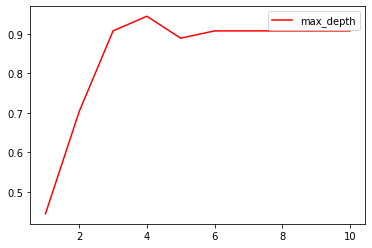

In [41]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion='entropy'
                                     ,random_state=30
                                     ,splitter='random'
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1, 11), test, color='red', label='max_depth')
plt.legend()
plt.show()

In [42]:
#apply返回每个测试样本所在的叶子节点的索引 
clf.apply(Xtest)

array([ 8,  4, 25, 19, 14,  4,  4, 16, 22,  4, 26,  4, 26, 16, 14, 22, 22,
       26, 16,  8, 25,  6,  4, 26, 25, 16, 19, 16, 12, 26, 16, 24, 14, 19,
        4,  4, 14, 12,  4, 26, 19, 26,  6, 16, 14,  4, 26,  8, 26, 14, 19,
       19, 12, 14], dtype=int64)

In [43]:
# predict返回每个测试样本的分类/回归结果 
clf.predict(Xtest)

array([2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2,
       2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 1, 1])

In [44]:
# 简单看看回归树是怎样工作的
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10
               ,scoring = 'neg_mean_squared_error')
#交叉验证cross_val_score的用法 

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

In [45]:
# 接下来我们到二维平面上来观察决策树是怎样拟合一条曲线的。
# 1.导入需要的库
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [46]:
# 2.创建一条含有噪声的正弦曲线
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
#np.random.rand(数组结构)，生成随机数组的函数
#了解降维函数ravel()的用法 
np.random.random((2, 1))

array([[0.43156183],
       [0.71015604]])

In [47]:
np.random.random((2, 1)).ravel()

array([0.14983983, 0.33621616])

In [48]:
np.random.random((2, 1)).ravel().shape

(2,)

In [49]:
# 3. 实例化&训练模型
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [50]:
# 4. 测试集导入模型，预测结果
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
#np.arrange(开始点，结束点，步长) 生成有序数组的函数
#了解增维切片np.newaxis的用法 
I = np.array([1, 2, 3, 4])
I

array([1, 2, 3, 4])

In [51]:
I.shape

(4,)

In [52]:
I[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4]])

In [53]:
I[:, np.newaxis].shape

(4, 1)

In [54]:
I[np.newaxis, :].shape

(1, 4)

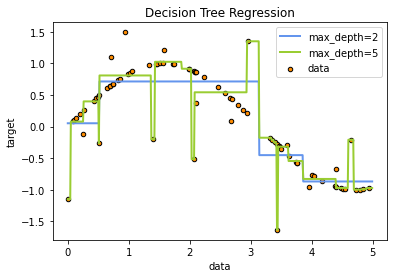

In [55]:
# 5.绘制图像
plt.figure()
plt.scatter(X, y, s=20, edgecolor='black', c='darkorange', label='data')
plt.plot(X_test, y_1, color='cornflowerblue', label='max_depth=2', linewidth=2)
plt.plot(X_test, y_2, color='yellowgreen', label='max_depth=5', linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

In [66]:
# 1.导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [67]:
# 2.导入数据集，探索数据
data = pd.read_csv('train.csv', index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [69]:
# 3.对数据集进行预处理
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"], inplace=True, axis=1)
# 处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法 
data['Age'] = data['Age'].fillna(data['Age'].mean())
data = data.dropna()

In [70]:
#将分类变量转换为数值型变量
#将二分类变量转换为数值型变量 
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1 
data['Sex'] = (data['Sex']=='male').astype('int')
#将三分类变量转换为数值型变量 
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))
#查看处理后的数据集
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [75]:
X = data.iloc[:, data.columns != 'Survived']
y = data.iloc[:, data.columns == 'Survived']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X, y, test_size=0.3)
#修正测试集和训练集的索引 
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
#查看分好的训练集和测试集 
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,0,48.000000,1,2,65.00,0
1,3,1,29.699118,1,0,24.15,2
2,1,1,29.000000,0,0,30.00,0
3,2,1,31.000000,0,0,13.00,0
4,1,1,18.000000,1,0,108.90,1


In [76]:
# 5. 导入模型，粗略跑一下查看结果
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)
score_

0.8089887640449438

0.8177860061287026


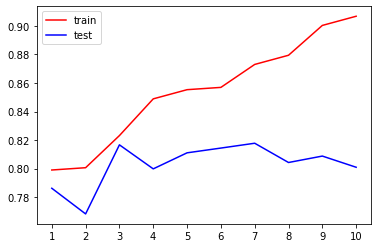

In [80]:
# 6.在不同max_depth下观察模型的拟合状况
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion='entropy'
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain, Ytrain)
    score_te = cross_val_score(clf, X, y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1, 11), tr, color='red', label='train')
plt.plot(range(1, 11), te, color='blue', label='test')
plt.xticks(range(1, 11))
plt.legend()
plt.show()
#这里为什么使用“entropy”？因为我们注意到，在最大深度=3的时候，模型拟合不足，在训练集和测试集上的表现接近，但却都不是非常理想，只能够达到83%左右，所以我们要使用entropy。

In [ ]:
# 7.用网格搜索调整参数
import numpy as np
gini_thresholds = np.linspace(0, 0.5, 20)
parameters = {'splitter':('best', 'random')
             ,'criterion':('gini', 'entropy')
             ,'max_depth':[*range(1,10)]
             ,'min_samples_leaf':[*range(1,50,5)]
             ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain, Ytrain)

In [84]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [85]:
GS.best_score_

0.8343317972350229

In [100]:
# 将在不同结构的数 据集上测试一下决策树的效果
# 1.导入需要的库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

In [101]:
#make_classification库生成随机的二分型数据 
X, y = make_classification(n_samples=100, #生成100个样本
                           n_features=2,  #包含2个特征，即生成二维数据                           
                           n_redundant=0, #添加冗余特征0个                           
                           n_informative=2, #包含信息的特征是2个
                           random_state=1,  #随机模式1                           
                           n_clusters_per_class=1 #每个簇内包含的标签类别有1个                          
                           )
#在这里可以查看一下X和y，其中X是100行带有两个2特征的数据，y是二分类标签 
#也可以画出散点图来观察一下X中特征的分布 
#plt.scatter(X[:,0],X[:,1])

#从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成 随机数组，通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏 #注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，两个簇的数据会混合在一起，分类器的效应会 继续下降 
rng = np.random.RandomState(2) #生成一种随机模式 
X += 2 * rng.uniform(size=X.shape) #加减0~1之间的随机数 
linearly_separable = (X, y) #生成了新的X，依然可以画散点图来观察一下特征的分布 
#plt.scatter(X[:,0],X[:,1])
 
#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中 
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),            
            linearly_separable]

C:\Anaconda\envs\sklearn\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


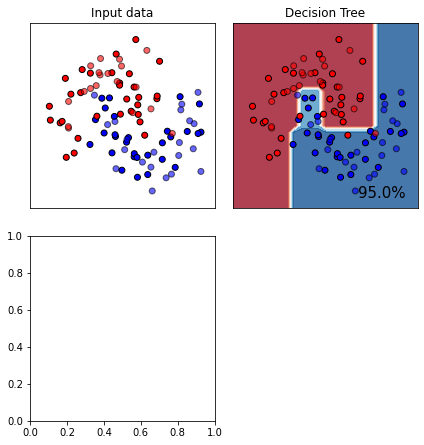

In [105]:
#创建画布，宽高比为6*9 
figure = plt.figure(figsize=(6,9))
#设置用来安排图像显示位置的全局变量i 
i = 1
#开始迭代数据，对datasets中的数据进行for循环
for ds_index, ds in enumerate(datasets):
    #对X中的数据进行标准化处理，然后分训练集和测试集    
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    #找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，创造一个比两个特征的区间本身更大 一点的区间    
    x1_min, x1_max = X[:, 0].min() - .5, X[:,0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:,1].max() + .5
    #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点    
    #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长    
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。    
    #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以 narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵    
    #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二 维的    
    array1, array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                                np.arange(x2_min, x2_max, 0.2))
    #接下来生成彩色画布
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上    
    ax = plt.subplot(len(datasets), 2, i)      
    #到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题    
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件    
    if ds_index == 0:
        ax.set_title('Input data')
        #将数据集的分布放到我们的坐标系上    
        #先放训练集    
        ax.scatter(X_train[:, 0], X_train[:,1], c=y_train,
                  cmap=cm_bright, edgecolors='k')   
        #放测试集    
        ax.scatter(X_test[:,0], X_test[:,1], c=y_test,
                  cmap=cm_bright, alpha=0.6, edgecolors='k')
        #为图设置坐标轴的最大值和最小值，并设定没有坐标轴
        ax.set_xlim(array1.min(), array1.max())
        ax.set_ylim(array2.min(), array2.max())
        ax.set_xticks(())
        ax.set_yticks(())
        #每次循环之后，改变i的取值让图每次位列不同的位置    
        i += 1      
        #至此为止，数据集本身的图像已经布置完毕，运行以上的代码，可以看见三个已经处理好的数据集        
        #############################从这里开始是决策树模型##########################        
        #迭代决策树，首先用subplot增加子图，subplot(行，列，索引)这样的结构，并使用索引i定义图的位置    
        #在这里，len(datasets)其实就是3，2是两列    
        #在函数最开始，我们定义了i=1，并且在上边建立数据集的图像的时候，已经让i+1,所以i在每次循环中的取值 是2，4，6    
        ax = plt.subplot(len(datasets), 2, i)      
        #决策树的建模过程：实例化 → fit训练 → score接口得到预测的准确率    
        clf = DecisionTreeClassifier(max_depth=5)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        #绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max]    
        #分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率    
        #类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量    
        #由于决策树在训练的时候导入的训练集X_train里面包含两个特征，所以我们在计算类概率的时候，也必须导入 结构相同的数组，即是说，必须有两个特征    
        #ravel()能够将一个多维数组转换成一维数组    
        #np.c_是能够将两个数组组合起来的函数 

        #在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策 树模型，生成的Z包含数据的索引和每个样本点对应的类概率，再切片，切出类概率    
        Z = clf.predict_proba(np.c_[array1.ravel(), array2.ravel()])[:,1] 
        #np.c_[np.array([1,2,3]), np.array([4,5,6])]        

        #将返回的类概率作为数据，放到contourf里面绘制去绘制轮廓    
        Z = Z.reshape(array1.shape)
        ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)

        #将数据集的分布放到我们的坐标系上    
        # 将训练集放到图中去    
        ax.scatter(X_train[:, 0]
                   ,X_train[:,1]
                  ,c=y_train
                  ,cmap=cm_bright
                  ,edgecolors='k')  
        # 将测试集放到图中去    
        ax.scatter(X_test[:,0]
                   ,X_test[:,1]
                   ,c=y_test
                   ,cmap=cm_bright
                   ,edgecolors='k'
                   ,alpha=0.6
                  )       
        #为图设置坐标轴的最大值和最小值    
        ax.set_xlim(array1.min(), array1.max())
        ax.set_ylim(array2.min(), array2.max())
        #设定坐标轴不显示标尺也不显示数字    
        ax.set_xticks(())
        ax.set_yticks(())

        #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件    
        if ds_index == 0:
            ax.set_title('Decision Tree')

        #写在右下角的数字        
        ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),
                    size=15, horizontalalignment='right')        

        #让i继续加一    
        i += 1
plt.tight_layout() 
plt.show() 